# Neural network

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt  
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap

np.random.seed(seed=1)

In [2]:
# Generate the dataset
X, y = make_circles(2000, noise = .1, random_state = 123, factor = .4)
Y = np.zeros((2000, 2)) # Define target matrix
Y[y==1, 1] = 1
Y[y==0, 0] = 1

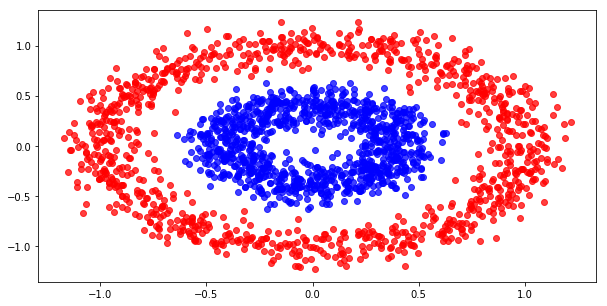

In [3]:
# Plot the dataset
plt.figure(figsize=(10,5))
plt.plot(X[y==0,0], X[y==0,1], "ro", alpha=0.75)
plt.plot(X[y==1,0], X[y==1,1], "bo", alpha=0.75)
plt.show()

In [4]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

def derivative(l): 
    return l*(1-l)

def loss_function(Y, layer):
    return -(Y * np.log(layer)).sum()
    
class NeuralNetwork(object):
        
    def __init__(self):       
        ## Random initialize hidden layer parameters
        self.bias_hidden = np.random.randn(1, 3) 
        self.weights_1 = np.random.randn(2, 3) 
        ## Random initialize output layer parameters
        self.bias_out = np.random.randn(1, 2) 
        self.weights_2 = np.random.randn(3, 2) 
        self.eta = 0.1  ## hIPERPARAMETER

        ## Loss over the iterations
        self.loss = []
        ## Momentum optimization
        self.momentum = [np.zeros_like(M) for M in [self.weights_1, self.bias_hidden, self.weights_2, self.bias_out]]

    def fit(self, X, y, alpha, epochs=100):
        self.alpha = alpha
        self.epochs = epochs
        
        for epoch in range(self.epochs):
            ## Forward propagation
            layer_1 = sigmoid((X @ self.weights_1) + self.bias_hidden)
            layer_2 = sigmoid((layer_1 @ self.weights_2) + self.bias_out)
            ## Back propagation
            error = layer_2 - Y
            delta = error * derivative(layer_2)
            weight_output = layer_1.T @ delta
            bias_output = np.sum(delta, axis=0, keepdims=True)
            output_error = (layer_1 * (1 - layer_1)) * (delta @ self.weights_2.T)
            weight_gradient = X.T @ output_error
            bias_gradient = np.sum(output_error, axis=0, keepdims=True)
            gradients = [weight_gradient, bias_gradient, weight_output, bias_output]
            self.momentum = [ self.eta * m - self.alpha * g for m,g in zip(self.momentum, gradients)]   
            ## Update parameters
            self.weights_1, self.bias_hidden, self.weights_2, self.bias_out = [P + M for P,M in zip([self.weights_1, self.bias_hidden, self.weights_2, self.bias_out], self.momentum)]
            self.loss.append(loss_function(Y,layer_2))

            if epoch%1000==0:
                print(f"Epoch: {epoch} | Error: {np.mean(np.abs(error))}")
        print(f"Epoch: {epoch+1} | Final error: {np.mean(np.abs(error))}")
    
    def predict(self,X):
        layer_1 = sigmoid((X @ self.weights_1) + self.bias_hidden)
        return np.around(sigmoid((layer_1 @ self.weights_2) + self.bias_out))

In [5]:
clf = NeuralNetwork()
alpha = 0.001
epochs = 10000
clf.fit(X,y,alpha,epochs)

Epoch: 0 | Error: 0.49603401994008656
Epoch: 1000 | Error: 0.16418168738349914
Epoch: 2000 | Error: 0.09373472564217968
Epoch: 3000 | Error: 0.07547690430713627
Epoch: 4000 | Error: 0.06608003228180503
Epoch: 5000 | Error: 0.059970370420008974
Epoch: 6000 | Error: 0.05551625220299963
Epoch: 7000 | Error: 0.052045491043337624
Epoch: 8000 | Error: 0.04921861190326715
Epoch: 9000 | Error: 0.04684202284530465
Epoch: 10000 | Final error: 0.044798824115052434


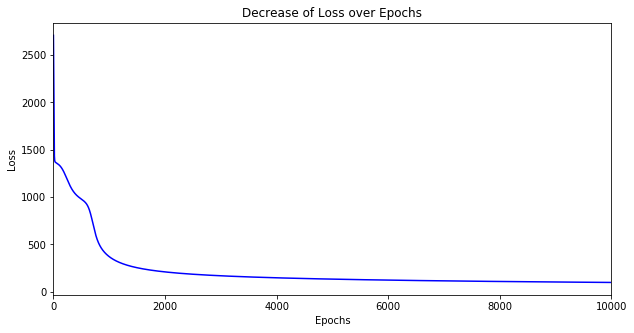

In [6]:
# Plot the loss over the iterations
plt.figure(figsize=(10,5)) 
plt.plot(clf.loss, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Decrease of Loss over Epochs')
plt.xlim(0, epochs)
plt.show()

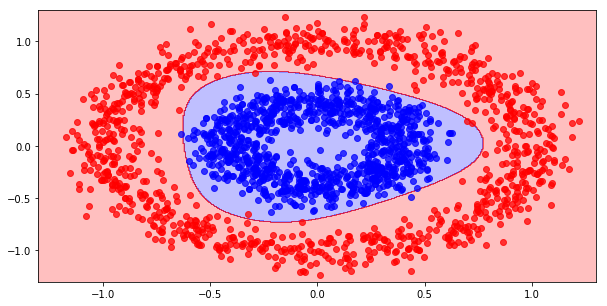

In [8]:
# Plot the resulting decision boundary
plt.figure(figsize=(10,5)) 
plt.plot(X[y==0,0], X[y==0,1], "ro", alpha=0.75)
plt.plot(X[y==1,0], X[y==1,1], "bo", alpha=0.75)
# Generate a grid over the input space
X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,500), np.linspace(-1.3,1.3,500))
Z = np.zeros(X1.shape)

for i in range(len(X1)):
    for j in range(len(X1)):
        Z[i,j] = clf.predict(np.asarray([X1[i,j], X2[i,j]]))[0,0]
        
# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha=0.25),
        colorConverter.to_rgba('r', alpha=0.25)])

plt.contourf(X1, X2, Z, cmap=cmap)
plt.show()